# Sujet 6 : Autour du Paradoxe de Simpson

### Contexte :

En 1972-1974, à Whickham, une ville du nord-est de l'Angleterre, située à environ 6,5 kilomètres au sud-ouest de Newcastle upon Tyne, un sondage d'un sixième des électeurs a été effectué afin d'éclairer des travaux sur les maladies thyroïdiennes et cardiaques (Tunbridge et al. 1977). Une suite de cette étude a été menée vingt ans plus tard (Vanderpump et al. 1995). Certains des résultats avaient trait au tabagisme et cherchaient à savoir si les individus étaient toujours en vie lors de la seconde étude. Par simplicité, nous nous restreindrons aux femmes et parmi celles-ci aux 1314 qui ont été catégorisées comme "fumant actuellement" ou "n'ayant jamais fumé". Il y avait relativement peu de femmes dans le sondage initial ayant fumé et ayant arrêté depuis (162) et très peu pour lesquelles l'information n'était pas disponible (18). La survie à 20 ans a été déterminée pour l'ensemble des femmes du premier sondage.

### L'étude de ce sujet se fera en 3 étapes :

1. Représenter dans un tableau le nombre total de femmes vivantes et décédées sur la période en fonction de leur habitude de tabagisme. Calculer dans chaque groupe (fumeuses / non fumeuses) le taux de mortalité (le rapport entre le nombre de femmes décédées dans un groupe et le nombre total de femmes dans ce groupe). Analyser ce résultat.

2. Reprendre la question 1 (effectifs et taux de mortalité) en rajoutant une nouvelle catégorie liée à la classe d'âge. On considérera les classes suivantes : 18-34 ans, 35-54 ans, 55-64 ans, plus de 65 ans. Analyser le résultat.

3. Etablir une régression logistique en introduisant un variable Death valant 1 ou 0 si la personne est morte ou pas au cours des 20 années entre les 2 sondages. Conclure.

### Etape 1 :

Tout d'abord, il faut commencer par inclure les bibliothèques dont nous aurons besoin.

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Il faut ensuite charger et lire le fichier

In [2]:
data_file = "Subject6_smoking.csv"

In [20]:
raw_data = pd.read_csv(data_file)
raw_data

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
2        No   Dead  57.5
3        No  Alive  47.1
4       Yes  Alive  81.4
5        No  Alive  36.8
6        No  Alive  23.8
7       Yes   Dead  57.5
8       Yes  Alive  24.8
9       Yes  Alive  49.5
10      Yes  Alive  30.0
11       No   Dead  66.0
12      Yes  Alive  49.2
13       No  Alive  58.4
14       No   Dead  60.6
15       No  Alive  25.1
16       No  Alive  43.5
17       No  Alive  27.1
18       No  Alive  58.3
19      Yes  Alive  65.7
20       No   Dead  73.2
21      Yes  Alive  38.3
22       No  Alive  33.4
23      Yes   Dead  62.3
24       No  Alive  18.0
25       No  Alive  56.2
26      Yes  Alive  59.2
27       No  Alive  25.8
28       No   Dead  36.9
29       No  Alive  20.2
...     ...    ...   ...
1284    Yes   Dead  36.0
1285    Yes  Alive  48.3
1286     No  Alive  63.1
1287     No  Alive  60.8
1288    Yes   Dead  39.3
1289     No  Alive  36.7
1290     No  Alive  63.8
1291     No   Dead  71.3
1292     No  Alive  57.7
1293     No  Alive  63.2
1294     No  Alive  46.6
1295    Yes   Dead  82.4
1296    Yes  Alive  38.3
1297    Yes  Alive  32.7
1298     No  Alive  39.7
1299    Yes   Dead  60.0
1300     No   Dead  71.0
1301     No  Alive  20.5
1302     No  Alive  44.4
1303    Yes  Alive  31.2
1304    Yes  Alive  47.8
1305    Yes  Alive  60.9
1306     No   Dead  61.4
1307    Yes  Alive  43.0
1308     No  Alive  42.1
1309    Yes  Alive  35.9
1310     No  Alive  22.3
1311    Yes   Dead  62.1
1312     No   Dead  88.6
1313     No  Alive  39.1

[1314 rows x 3 columns]

 Création de 2 "tableaux" à partir du contenu du fichier csv :
        *nonFumeuses* contient les données des personnes qui ne fument pas (qui ont "No" dans la colonne "Smoker")
        et *fumeuses* contient les données des personnes qui fument (qui ont "Yes" dans la colonne "Smoker")

In [13]:
#trier = raw_data.sort_values(by = ["Smoker"])
masq = raw_data["Smoker"] == "Yes"
fumeuses = raw_data.loc[masq]
nonFumeuses = trier.loc[raw_data["Smoker"]=="No"]



In [21]:
#Affichage
fumeuses

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
4       Yes  Alive  81.4
7       Yes   Dead  57.5
8       Yes  Alive  24.8
9       Yes  Alive  49.5
10      Yes  Alive  30.0
12      Yes  Alive  49.2
19      Yes  Alive  65.7
21      Yes  Alive  38.3
23      Yes   Dead  62.3
26      Yes  Alive  59.2
30      Yes  Alive  34.6
31      Yes  Alive  51.9
32      Yes  Alive  49.9
35      Yes  Alive  46.7
36      Yes  Alive  44.4
37      Yes  Alive  29.5
38      Yes   Dead  33.0
39      Yes  Alive  35.6
40      Yes  Alive  39.1
42      Yes  Alive  35.7
46      Yes   Dead  44.3
48      Yes  Alive  37.5
49      Yes  Alive  22.1
53      Yes  Alive  39.0
56      Yes  Alive  40.1
60      Yes  Alive  58.1
61      Yes  Alive  37.3
63      Yes   Dead  36.3
...     ...    ...   ...
1240    Yes  Alive  29.7
1243    Yes  Alive  40.1
1251    Yes  Alive  27.8
1252    Yes  Alive  52.4
1253    Yes  Alive  27.8
1254    Yes  Alive  41.0
1259    Yes  Alive  40.8
1260    Yes  Alive  20.4
1263    Yes  Alive  20.9
1264    Yes  Alive  45.5
1269    Yes  Alive  38.8
1270    Yes  Alive  55.5
1271    Yes  Alive  24.9
1273    Yes  Alive  55.7
1276    Yes  Alive  58.5
1278    Yes  Alive  43.7
1282    Yes  Alive  51.2
1284    Yes   Dead  36.0
1285    Yes  Alive  48.3
1288    Yes   Dead  39.3
1295    Yes   Dead  82.4
1296    Yes  Alive  38.3
1297    Yes  Alive  32.7
1299    Yes   Dead  60.0
1303    Yes  Alive  31.2
1304    Yes  Alive  47.8
1305    Yes  Alive  60.9
1307    Yes  Alive  43.0
1309    Yes  Alive  35.9
1311    Yes   Dead  62.1

[582 rows x 3 columns]

In [22]:
#Affichage
nonFumeuses

Smoker Status   Age
1313     No  Alive  39.1
1048     No  Alive  28.5
568      No  Alive  33.5
1047     No  Alive  62.6
570      No   Dead  56.2
1046     No  Alive  20.3
1045     No  Alive  48.5
1044     No  Alive  32.2
574      No  Alive  51.6
576      No  Alive  41.4
577      No   Dead  65.4
578      No   Dead  67.7
579      No  Alive  37.8
1042     No  Alive  61.5
581      No  Alive  23.9
582      No  Alive  60.1
585      No   Dead  75.6
586      No   Dead  72.1
1039     No  Alive  21.7
588      No   Dead  55.3
1038     No   Dead  81.8
590      No   Dead  79.3
564      No   Dead  29.8
1051     No  Alive  53.8
1052     No  Alive  20.7
561      No  Alive  62.4
529      No  Alive  25.5
1068     No  Alive  49.4
533      No  Alive  35.1
534      No  Alive  38.0
...     ...    ...   ...
1128     No  Alive  19.1
396      No  Alive  20.4
261      No  Alive  49.1
1190     No  Alive  38.7
268      No  Alive  52.4
256      No  Alive  52.6
398      No  Alive  46.2
277      No  Alive  55.3
1183     No  Alive  57.5
278      No   Dead  87.7
383      No   Dead  74.1
1196     No   Dead  76.2
273      No  Alive  36.5
252      No  Alive  20.1
384      No  Alive  37.0
403      No   Dead  78.0
250      No  Alive  30.8
249      No   Dead  84.3
404      No  Alive  26.8
1131     No  Alive  22.9
1184     No  Alive  46.5
282      No  Alive  18.5
1194     No   Dead  83.3
255      No  Alive  19.6
405      No  Alive  63.0
276      No  Alive  38.4
1124     No  Alive  52.0
275      No  Alive  38.8
1185     No   Dead  73.8
280      No  Alive  74.1

[732 rows x 3 columns]

Calcul du nombre **total** de fumeuses (*nbTotalF*) et de non fumeuses (*nbTotalNF*)

In [18]:
nbTotalF = len(fumeuses.axes[0])
nbTotalNF = len(nonFumeuses.axes[0])
print("Le nombre total de fumeuses est de :", nbTotalF)
print("Le nombre total de non fumeuses est de :", nbTotalNF)

Le nombre total de fumeuses est de : 582
Le nombre total de non fumeuses est de : 732


Calcul du nombre de **fumeuses décédées** (*nbDecedeesF*)

In [8]:
nbDecedeesF = len(fumeuses.loc[fumeuses["Status"]=="Dead"])
nbDecedeesF

139

Calcul du nombre de **non fumeuses décédées** (*nbDecedeesNF*)

In [9]:
nbDecedeesNF = len(nonFumeuses.loc[nonFumeuses["Status"]=="Dead"])
nbDecedeesNF

230

Calcul du **taux de mortalité** des fumeuses (*tauxMortF*) et des non fumeuses (*tauxMortNF*)

In [10]:
tauxMortF = nbDecedeesF/nbTotalF
tauxMortNF = nbDecedeesNF/nbTotalNF
print("Sur la période donnée, il y a pour les fumeuses un taux de mortalité de : ", tauxMortF*100, "%")
print("et il y a pour les non fumeuses un taux de mortalité de : ", tauxMortNF*100, "%")

Sur la période donnée, il y a pour les fumeuses un taux de mortalité de :  23.883161512027492 %
et il y a pour les non fumeuses un taux de mortalité de :  31.420765027322407 %


Création d'une nouvelle DataFrame pandas (*dt*) qui contient les taux de mortalité selon le statut (fumeuse ou non) en vue de la construction d'un graphique utilisant ces données.

In [11]:
d = {"tauxMortalite" : [tauxMortF*100, tauxMortNF*100], "Statut" : ["Fumeuses", "nonFumeuses"]}
dt = pd.DataFrame(data = d)
dt

Statut  tauxMortalite
0     Fumeuses      23.883162
1  nonFumeuses      31.420765

Création d'un diagramme en barre pour illustrer les calculs précédents.

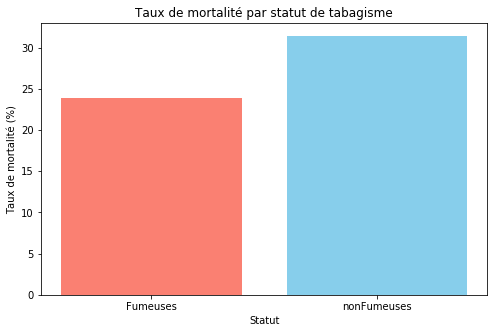

In [15]:
%matplotlib inline
plt.figure(figsize=(8, 5))
plt.bar(dt["Statut"], dt["tauxMortalite"], color=['salmon', 'skyblue'])

plt.title("Taux de mortalité par statut de tabagisme")
plt.xlabel("Statut")
plt.ylabel("Taux de mortalité (%)")

plt.show()


On obtient des résultats assez surprenants dans le sens où, étant donné que l'on nous a souvent répété que fumer est mauvais pour la santé, nous nous attendions à retrouver ce fait dans cette étude.
Or, nous pouvons observer que le résultat des calculs effectués nous montre l'inverse de ce à quoi nous nous attendions : le groupe de femmes qui ne fumaient pas a un taux de mortalité supérieur à celui composé de femmes qui fumaient.

# Etape 2

In [25]:
nb18_34F = len(fumeuses.loc[fumeuses["Age"]<=34]) - len(fumeuses.loc[fumeuses["Age"]<18])
nb18_34NF = len(nonFumeuses.loc[nonFumeuses["Age"]<=34]) - len(nonFumeuses.loc[nonFumeuses["Age"]<18])

In [34]:
test = fumeuses.loc[fumeuses["Age"]<=34]
t2 = test.loc[test["Age"]>18]

nbDecedees18_34F = len(t2.loc[t2["Status"]=="Dead"])
print(nbDecedees18_34F, "fumeuses ayant entre 18 et 34 ans lors du premier sondage sont décédées durant la période de 20 ans")

5 fumeuses ayant entre 18 et 34 ans lors du premier sondage sont décédées durant la période de 20 ans
